##### Question 1

We could use LASSO to get the most insightful feautes and use them for prediction

##### Question 2-a

X is not full rank so there is not a unique solution

##### Questoin 2-b

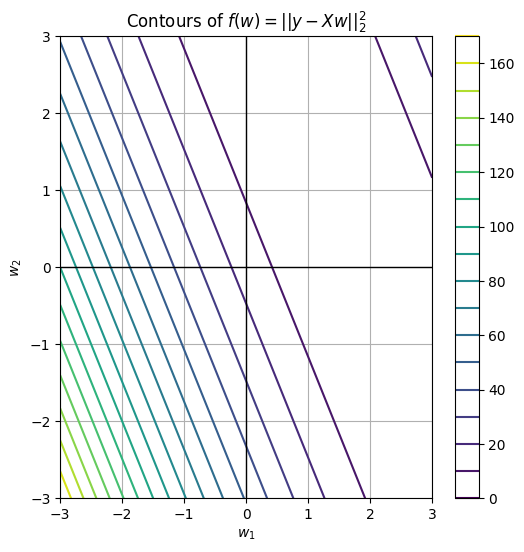

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(w1, w2):
    return (4 - 2*w1 - w2)**2

w1_vals = np.linspace(-3, 3, 400)
w2_vals = np.linspace(-3, 3, 400)
W1, W2 = np.meshgrid(w1_vals, w2_vals)

F = cost_function(W1, W2)

plt.figure(figsize=(6,6))
cp = plt.contour(W1, W2, F, levels=20, cmap='viridis')
plt.colorbar(cp)
plt.title(r'Contours of $f(w) = ||y - Xw||_2^2$')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.show()


##### Question 2-c

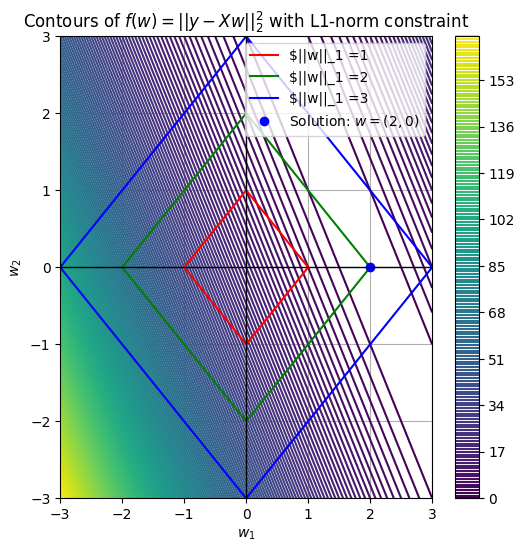

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(w1, w2):
    return (4 - 2*w1 - w2)**2

def l1_norm_constraint(c):
    w1 = np.linspace(-c, c, 400)
    w2_upper = c - np.abs(w1)
    w2_lower = -(c - np.abs(w1))
    return w1, w2_upper, w2_lower

w1_vals = np.linspace(-3, 3, 400)
w2_vals = np.linspace(-3, 3, 400)
W1, W2 = np.meshgrid(w1_vals, w2_vals)

F = cost_function(W1, W2)

plt.figure(figsize=(6,6))
cp = plt.contour(W1, W2, F, levels=200, cmap='viridis')
plt.colorbar(cp)

for c, color in zip(range(1, 4), ['r', 'g', 'b']):
    w1, w2_upper, w2_lower = l1_norm_constraint(c)
    plt.plot(w1, w2_upper, color=color, label=r'$||w||_1 ='+str(c))
    plt.plot(w1, w2_lower, color=color)

plt.plot(2, 0, 'bo', label=r'Solution: $w = (2,0)$')
plt.title(r'Contours of $f(w) = ||y - Xw||_2^2$ with L1-norm constraint')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.legend(loc='best')
plt.show()


##### Question 2-d

/var/folders/tn/v9tpvrrs4qgdbw0xd1q0l8qh0000gn/T/ipykernel_81974/3853232607.py:21: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  plt.colorbar(cp.collections[0], label=f'Cost for λ={lam}')


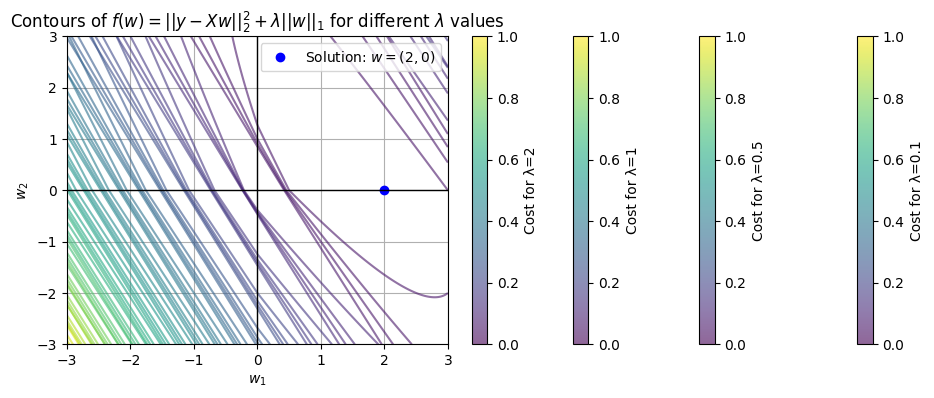

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(w1, w2, lam=0.1):
    """Combined cost function for LASSO: ||y - Xw||_2^2 + lambda ||w||_1"""
    residual = 4 - (2 * w1 + w2)
    l1_norm = np.abs(w1) + np.abs(w2)
    return residual**2 + lam * l1_norm

w1_vals = np.linspace(-3, 3, 400)
w2_vals = np.linspace(-3, 3, 400)
W1, W2 = np.meshgrid(w1_vals, w2_vals)

# Plot the cost function for different values of lambda
lambda_vals = [0.1, 0.5, 1, 2]
plt.figure(figsize=(12,4))

for lam in lambda_vals:
    F = cost_function(W1, W2, lam)
    cp = plt.contour(W1, W2, F, levels=20, cmap='viridis', alpha=0.6)
    plt.colorbar(cp.collections[0], label=f'Cost for λ={lam}')

# Plot the solution point for visualization
plt.plot(2, 0, 'bo', label=r'Solution: $w = (2,0)$')

plt.title(r'Contours of $f(w) = ||y - Xw||_2^2 + \lambda ||w||_1$ for different $\lambda$ values')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.legend(loc='best')
plt.show()


In [18]:
def prxgraddescent_l1(X,y,tau,lam,w_init,it):

## compute it iterations of L2 proximal gradient descent starting at w1
## w_{k+1}= (w_k - tau*X'*(X*w_k - y)/(1+lam*tau)
## step size tau
    W = np.zeros((w_init.shape[0], it+1))
    Z = np.zeros((w_init.shape[0], it+1))
    W[:,[0]] = w_init
    for k in range(it):
        Z[:,[k+1]] = W[:,[k]] - tau * X.T @ (X @ W[:,[k]] - y);
        W[:,[k+1]] = np.sign(Z[:,[k+1]])* np.clip(np.abs(Z[:,[k+1]])-lam*tau/2,0,float("inf"))
        
    return W,Z

## Proximal gradient descent trajectories
## Least Squares Problem
X = np.array([[2, 1]])
y = np.array([[4]])

### Find values of f(w), the contour plot surface for 
w1 = np.arange(-1,3,.1)
w2 = np.arange(-1,3,.1)
fw = np.zeros((len(w1), len(w2)))
for i in range(len(w2)):
    for j in range(len(w1)):
        w = np.array([ [w1[j]], [w2[i]] ])
        fw[i,j] = (X @ w - y)**2


/var/folders/tn/v9tpvrrs4qgdbw0xd1q0l8qh0000gn/T/ipykernel_81974/3034412313.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fw[i,j] = (X @ w - y)**2


##### Questoin 3-a

<>:21: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
/var/folders/tn/v9tpvrrs4qgdbw0xd1q0l8qh0000gn/T/ipykernel_81974/1140934211.py:21: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\\tau = $'+str(.5)+', $\lambda = $'+str(lam));


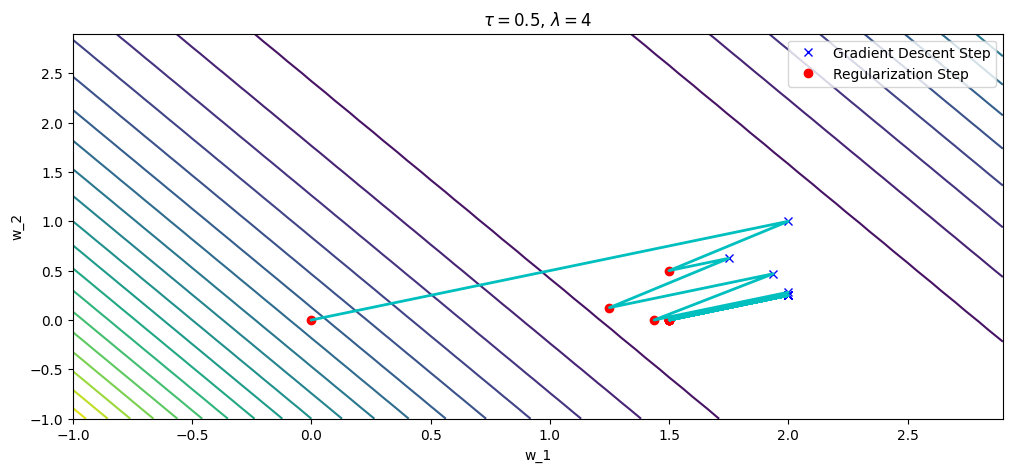

In [20]:
## Find and display weights generated by gradient descent

w_init = np.array([[0],[0]])
lam = 4;
it = 10
tau = 0.25
W,Z = prxgraddescent_l1(X,y,tau,lam,w_init,it)
# Concatenate gradient and regularization steps to display trajectory
G = np.zeros((2,0))
for i in range(it):
    G = np.hstack((G,np.hstack((W[:,[i]],Z[:,[i+1]]))))

plt.figure(figsize=(12,5))
plt.contour(w1,w2,fw,20)
plt.plot(Z[0,1::],Z[1,1:],'bx',linewidth=2, label="Gradient Descent Step")
plt.plot(W[0,:],W[1,:],'ro',linewidth=2, label="Regularization Step")
plt.plot(G[0,:],G[1,:],'-c',linewidth=2)
plt.legend()
plt.xlabel('w_1')
plt.ylabel('w_2')
plt.title('$\\tau = $'+str(.5)+', $\lambda = $'+str(lam));

About 5 iterations for convergance

##### Question 3-b

<>:21: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
/var/folders/tn/v9tpvrrs4qgdbw0xd1q0l8qh0000gn/T/ipykernel_81974/1212030886.py:21: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\\tau = $'+str(.5)+', $\lambda = $'+str(lam));


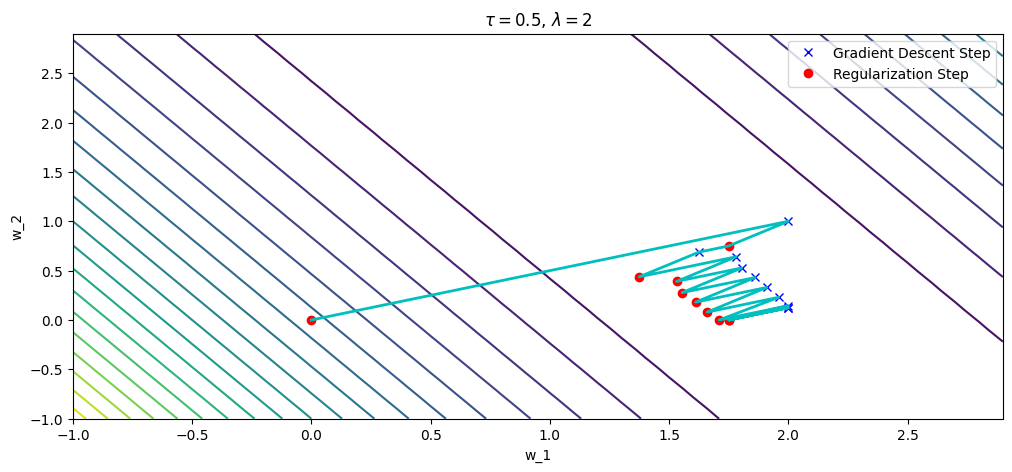

In [21]:
## Find and display weights generated by gradient descent

w_init = np.array([[0],[0]])
lam = 2;
it = 10
tau = 0.25
W,Z = prxgraddescent_l1(X,y,tau,lam,w_init,it)
# Concatenate gradient and regularization steps to display trajectory
G = np.zeros((2,0))
for i in range(it):
    G = np.hstack((G,np.hstack((W[:,[i]],Z[:,[i+1]]))))

plt.figure(figsize=(12,5))
plt.contour(w1,w2,fw,20)
plt.plot(Z[0,1::],Z[1,1:],'bx',linewidth=2, label="Gradient Descent Step")
plt.plot(W[0,:],W[1,:],'ro',linewidth=2, label="Regularization Step")
plt.plot(G[0,:],G[1,:],'-c',linewidth=2)
plt.legend()
plt.xlabel('w_1')
plt.ylabel('w_2')
plt.title('$\\tau = $'+str(.5)+', $\lambda = $'+str(lam));

About 9 iterations for convergance

##### Question 3-c

The weights that are less than a specified threshold are set to zero and the rest are scalled down

##### Question 4-a

$$
\tau < \frac{1}{||X||_{op}^2}
$$

In [26]:
operator_norm = np.linalg.norm(X, ord=2)
print(1 / (operator_norm*operator_norm))

0.19999999999999996


##### Question 4-b

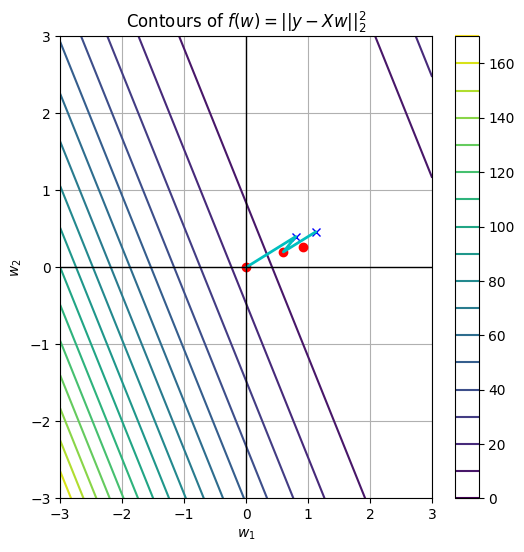

In [27]:
## Find and display weights generated by gradient descent
X = np.array([[2, 1]])
y = np.array([[4]])


w_init = np.array([[0],[0]])
lam = 4;
it = 2
tau = 0.1 # TODO
W,Z = prxgraddescent_l1(X,y,tau,lam,w_init,it)
# Concatenate gradient and regularization steps to display trajectory
G = np.zeros((2,0))
for i in range(it):
    G = np.hstack((G,np.hstack((W[:,[i]],Z[:,[i+1]]))))

def cost_function(w1, w2):
    return (4 - 2*w1 - w2)**2

w1_vals = np.linspace(-3, 3, 400)
w2_vals = np.linspace(-3, 3, 400)
W1, W2 = np.meshgrid(w1_vals, w2_vals)

F = cost_function(W1, W2)

plt.figure(figsize=(6,6))
cp = plt.contour(W1, W2, F, levels=20, cmap='viridis')
plt.colorbar(cp)
plt.plot(Z[0,1::],Z[1,1:],'bx',linewidth=2, label="Gradient Descent Step")
plt.plot(W[0,:],W[1,:],'ro',linewidth=2, label="Regularization Step")
plt.plot(G[0,:],G[1,:],'-c',linewidth=2)
plt.title(r'Contours of $f(w) = ||y - Xw||_2^2$')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.show()
